<a href="https://colab.research.google.com/github/biwanun1690/Data_science_basic_24_25_group_2/blob/main/%D0%9A%D1%83%D0%BF%D1%80%D0%B8%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0_%D0%90%D0%BD%D0%BD%D0%B0_%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Удовлетворенность**  **перелетом (удовлетворен** **или нет)**

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

od.download("https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction?select=train.csv")

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: biwanun1690
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction


100%|██████████| 2.71M/2.71M [00:00<00:00, 49.5MB/s]

In [60]:
df = pd.read_csv('airline-passenger-satisfaction/train.csv', sep=',')

df.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [17]:
# размеры
print(df.shape)

(103904, 25)


In [18]:
#какие типы данных представлены в наборе
print(df.info())
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [19]:
# Пропуски
df.isnull().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [46]:
# Заполнение пропусков
m = df['Arrival Delay in Minutes'].mean()
df['Arrival Delay in Minutes'].fillna(m, inplace=True)

<ipython-input-46-c9ee3d4e2912>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay in Minutes'].fillna(m, inplace=True)


In [70]:
# Нахождение колонок с категориальными признаками
colomns = df.columns
types = df.dtypes
print(colomns, types)
obj = colomns[types[colomns] == 'object']
print(obj)

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'satisfaction'],
      dtype='object') Gender                               object
Customer Type                        object
Age                                   int64
Type of Travel                       object
Class                                object
Flight Distance                       int64
Inflight wifi service                 int64
Departure/Arrival time convenient     int64
Ease of Online booking                int64
Gate location                         int64
Food and drink                        int64
Online boarding     

In [22]:
# Из категорий в числа
from sklearn import preprocessing

# инициализация алгоритма кодирования
label_encoder = preprocessing.LabelEncoder()

# Обучение алгоритма:
for col in obj:
  label_encoder.fit(df[col])
  df[col] = label_encoder.transform(df[col])

In [71]:
from sklearn import preprocessing

# Инициализация алгоритмa
one_hot_encoder = preprocessing.OneHotEncoder()

for col in obj:
  # Обучение алгоритма кодировщика
  one_hot_encoder.fit(df[col].values.reshape(-1, 1))

  # Применение модели кодировщика
  x_new = one_hot_encoder.transform(df[col].values.reshape(-1, 1)).toarray()

  # Получение названий новых столбцов
  encoded_columns = one_hot_encoder.get_feature_names_out([col])

  # Преобразование в DataFrame
  encoded_df = pd.DataFrame(x_new, columns=encoded_columns)

  # Объединение с исходным DataFrame
  df = pd.concat([df, encoded_df], axis=1)

  # Удаление оригинального столбца
  df.drop(columns=[col], inplace=True)

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['satisfaction'])
df[col] = label_encoder.transform(df['satisfaction'])

In [72]:
df.head(10)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Class
0,13,460,3,4,3,1,5,3,5,5,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0
1,25,235,3,2,3,3,1,3,1,1,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0
2,26,1142,2,2,2,2,5,5,5,5,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1
3,25,562,2,5,5,5,2,2,2,2,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
4,61,214,3,3,3,3,4,5,5,3,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1
5,26,1180,3,4,2,1,1,2,1,1,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
6,47,1276,2,4,2,3,2,2,2,2,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
7,52,2035,4,3,4,4,5,5,5,5,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1
8,41,853,1,2,2,2,4,3,3,1,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
9,20,1061,3,3,3,4,2,3,3,2,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0


In [24]:
# Интервалы
df.mean()

,0
Unnamed: 0,51951.500000
id,64924.210502
Gender,0.492541
Customer Type,0.182678
Age,39.379706
Type of Travel,0.310373
Class,0.594135
Flight Distance,1189.448375
Inflight wifi service,2.729683
Departure/Arrival time convenient,3.060296


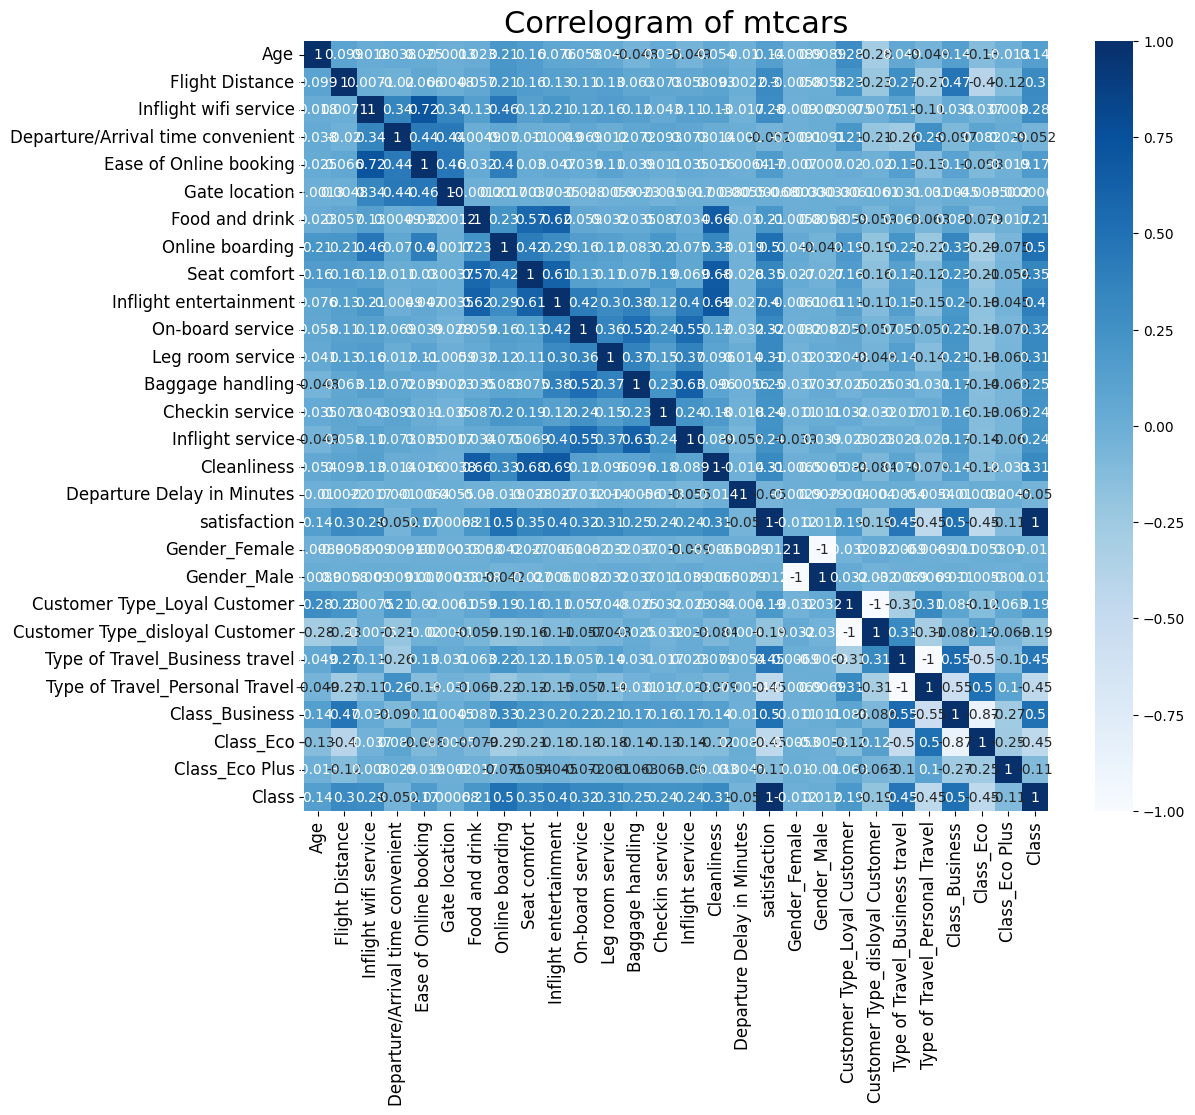

In [73]:
# Матрица корреляций
plt.figure(figsize=(12,10))

corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, xticklabels=df.corr(numeric_only=True).columns, yticklabels=df.corr(numeric_only=True).columns, cmap='Blues', center=0, annot=True)

plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [74]:
df = df.drop(['Arrival Delay in Minutes', 'Unnamed: 0', 'id'], axis = 1)

KeyError: "['Arrival Delay in Minutes', 'Unnamed: 0', 'id'] not found in axis"

In [75]:
%%time
from sklearn.model_selection import train_test_split

# Выделим вектор признаков Х и вектор ответов y
X = df.drop(['satisfaction'], axis=1)
y = df['satisfaction']

CPU times: user 9.39 ms, sys: 0 ns, total: 9.39 ms
Wall time: 8.47 ms


In [76]:
# Маштабирование -> Нормализация
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler()
X_norm = mmsc.fit_transform(X)
print(X_norm)

# train - на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3)

[[0.07692308 0.08663166 0.6        ... 0.         1.         0.        ]
 [0.23076923 0.04119548 0.6        ... 0.         0.         0.        ]
 [0.24358974 0.2243538  0.4        ... 0.         0.         1.        ]
 ...
 [0.29487179 0.39660743 0.2        ... 0.         0.         0.        ]
 [0.19230769 0.19567851 0.2        ... 1.         0.         0.        ]
 [0.25641026 0.34168013 0.2        ... 0.         0.         0.        ]]


In [77]:
# Создание модели
model = LogisticRegression()

# модель учится, для этого ей нужны правильные
model.fit(X_train, y_train)

LogisticRegression()

In [78]:
# коэффиценты при признаках
# показывают важность каждого признака
model.coef_

array([[-6.60445752e-01, -1.99756211e-01,  5.36681855e-01,
        -4.86799995e-01, -8.76503876e-03, -7.20170278e-01,
        -3.76683154e-01,  8.54775169e-01,  1.14733282e-02,
         4.91031902e-01,  2.65140564e-01,  1.20693780e-01,
         1.82670967e-01,  8.13629039e-02, -2.63023458e-01,
         9.62706041e-02, -8.28396021e-02, -1.37222024e+00,
        -1.34087250e+00, -9.64580829e-01, -1.74851191e+00,
        -9.22223048e-01, -1.79086969e+00, -4.24978130e-01,
        -1.30659744e+00, -9.81517173e-01,  1.44691113e+01]])

In [79]:
from sklearn.metrics import accuracy_score

# answers_pred - ответы которые вернула модель для X_test
# y_test - это правильные ответы для X_test
answers_pred = model.predict(X_test)
print(accuracy_score(y_test, answers_pred))

1.0


In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

confusion_matrix(y_test, answers_pred)

array([[17589,     0],
       [    0, 13583]])

In [81]:
df_y = pd.DataFrame(y_test)
df_y.value_counts()

,count
satisfaction,
0,17589
1,13583


In [82]:
tn, fp, fn, tp = confusion_matrix(y_test, answers_pred).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

TN: 17589
FP: 0
FN: 0
TP: 13583


In [83]:
print(accuracy_score(y_test, answers_pred),
recall_score(y_test, answers_pred),
precision_score(y_test, answers_pred),
f1_score(y_test, answers_pred))

1.0 1.0 1.0 1.0
